<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/CNN_CIFAR10_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier using CNN (CIFAR-10)

## CIFAR-10 Dataset
The CIFAR-10 dataset is a widely used dataset for image classification. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

The 10 classes are:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

## Loading and exploring CIFAR-10 Dataset

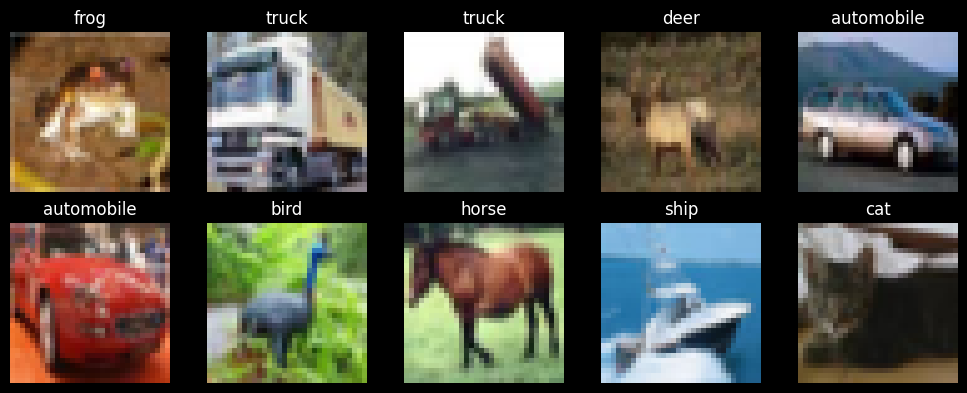

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Show sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i][0])])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Building CNN Model

In [23]:
model = models.Sequential([
    Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [3]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.2, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.3278 - loss: 1.8236 - val_accuracy: 0.5142 - val_loss: 1.3620
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5441 - loss: 1.2717 - val_accuracy: 0.5940 - val_loss: 1.1496
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6197 - loss: 1.0813 - val_accuracy: 0.6166 - val_loss: 1.0985
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6710 - loss: 0.9426 - val_accuracy: 0.6664 - val_loss: 0.9523
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7093 - loss: 0.8349 - val_accuracy: 0.6817 - val_loss: 0.9104
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7401 - loss: 0.7411 - val_accuracy: 0.7017 - val_loss: 0.8592
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7622 - loss: 0.6741 - val_accuracy: 0.7088 - val_loss: 0.8435
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7832 - loss: 0.6168 - 

## Evaluating the Model

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7045 - loss: 0.9001
Test Accuracy: 0.7060999870300293


## Visualizing Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


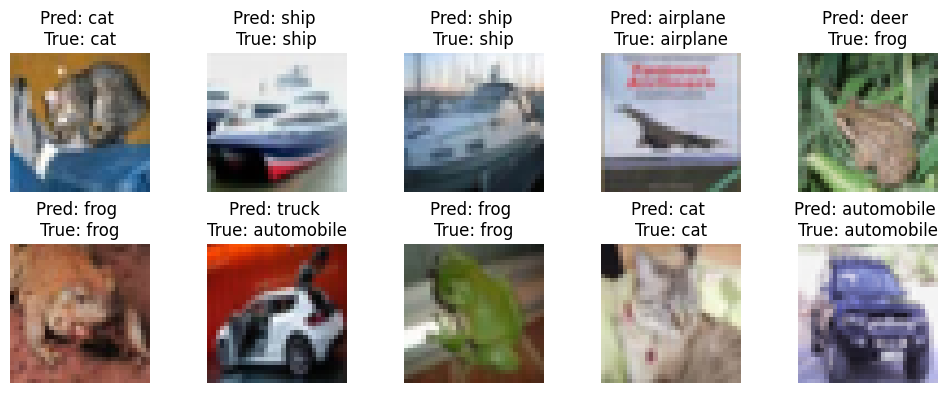

In [5]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]} \nTrue: {class_names[int(y_test[i][0])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Saving the Model

In [6]:
model.save("cifar10_cnn_model.keras")

## Visualizing training history
Plotting the accuracy and loss during training for both the training and validation sets using the `history` object from the model training.


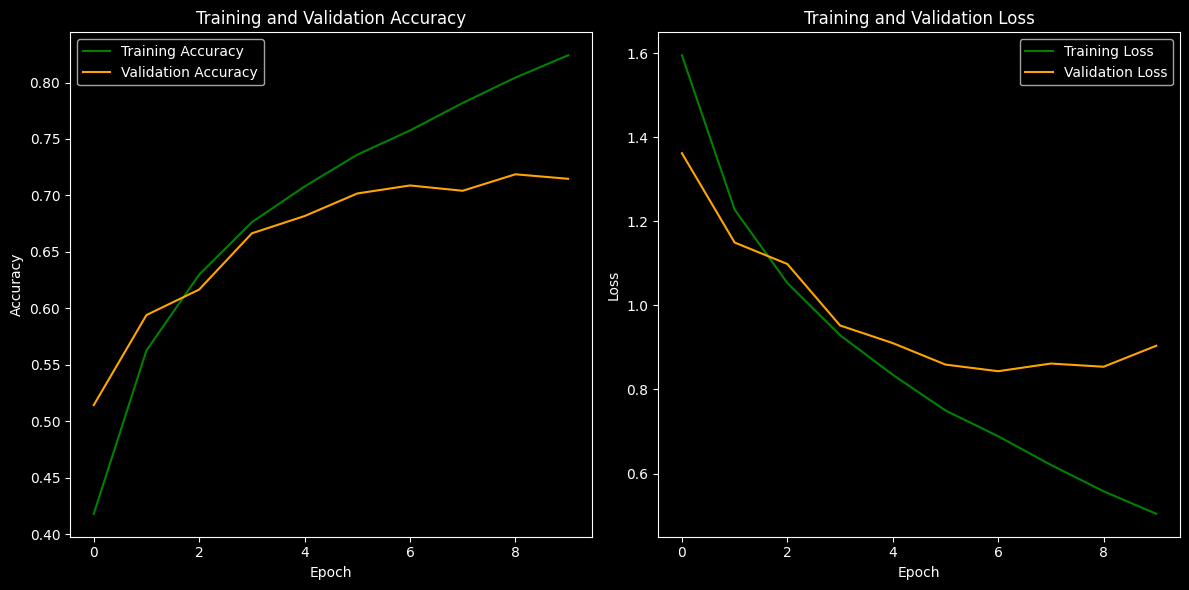

In [17]:
plt.style.use('dark_background')

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Attempting to making the model more robust

Implementing data augmentation techniques using `ImageDataGenerator` to increase the size and variability of the training dataset.

This will include change the orientation of the input images to train the model for wider scenarios.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)

augmented_train_generator = datagen.flow(X_train, y_train, batch_size=64, shuffle=True)

## Experimenting with the model architecture
Modify the existing CNN model architecture by adding, removing, or changing layers and parameters.


In [19]:
model_modified = models.Sequential([
    Input(shape=(32,32,3)),
    layers.Conv2D(64, (5,5), activation='relu', padding='same'), # Increased filters and filter size
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'), # Increased filters
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'), # Added another convolutional layer
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'), # Increased dense layer units
    layers.Dropout(0.5), # Added dropout for regularization
    layers.Dense(10, activation='softmax')
])

model_modified.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

model_modified.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425,290 (5.44 MB)

 Trainable params: 1,425,290 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

## Training and evaluation of the modified model

In [20]:
history_modified = model_modified.fit(augmented_train_generator, epochs=10,
                                      validation_data=(X_test, y_test),
                                      steps_per_epoch=X_train.shape[0] // 64)

test_loss_modified, test_acc_modified = model_modified.evaluate(X_test, y_test)
print("Modified Model Test Accuracy:", test_acc_modified)
print("Modified Model Test Loss:", test_loss_modified)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 244s 311ms/step - accuracy: 0.2814 - loss: 1.9249 - val_accuracy: 0.5267 - val_loss: 1.3039
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3:31 271ms/step - accuracy: 0.4844 - loss: 1.4223

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4844 - loss: 1.4223 - val_accuracy: 0.5244 - val_loss: 1.3166
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 301s 310ms/step - accuracy: 0.4804 - loss: 1.4449 - val_accuracy: 0.5945 - val_loss: 1.1253
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.5781 - loss: 1.2287 - val_accuracy: 0.5956 - val_loss: 1.1238
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 301s 309ms/step - accuracy: 0.5545 - loss: 1.2535 - val_accuracy: 0.6220 - val_loss: 1.0383
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5625 - loss: 1.1375 - val_accuracy: 0.6137 - val_loss: 1.0549
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 258s 320ms/step - accuracy: 0.5946 - loss: 1.1440 - val_accuracy: 0.6758 - val_loss: 0.9339
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6875 - loss: 0.8945 - val_accuracy: 0.6784 - val_loss: 0.9275
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 249s 319ms/step - accuracy: 0.6257 - loss: 1.0663 - val

In [21]:
print("Original Model:")
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

print("\nModified Model with Data Augmentation:")
print("Test Accuracy:", test_acc_modified)
print("Test Loss:", test_loss_modified)

Original Model:
Test Accuracy: 0.7060999870300293
Test Loss: 0.9223915934562683

Modified Model with Data Augmentation:
Test Accuracy: 0.6873000264167786
Test Loss: 0.8895407915115356


## Conclusion

The steps to build, train, and evaluate a CNN model for CIFAR-10 image classification were followed in the notebook. Additional experiments were conducted to compare model performance viz. modified architecture and data augmentation.

**Summary of Findings:**

*   The original model achieved a test accuracy of 70.6 % and a test loss of 0.92.
*   The modified model with data augmentation achieved a test accuracy of 68.73 % and a test loss of 0.89.

In this case, the modified architecture with data augmentation resulted in a slight worse preformance in test accuracy and test loss compared to the original model.